In [1]:
import pydicom as dicom
import matplotlib.pyplot as plt
from os import listdir
import os
import shutil
import glob
import cv2
import numpy as np
# from skimage import exposure
from math import *
from importlib import reload

In [2]:
def func(path):
    shutil.copyfile('')
    fileLoc = path[:45]+'thicknesses/myocardium.txt'
    inputFile = open(fileLoc,'r+');
    line = inputFile.readlines()
    arr = line[0].split();
    res = float(arr.pop(0));
    newLine = " ".join(arr)
    inputFile = open(fileLoc, 'w')
    inputFile.write('');
    inputFile.write(newLine)
    inputFile.close()
    return res

In [3]:
def calulateAverageThickness(path):
#     read image
    src=cv2.imread(path)
#     get grayscale image
    grayImage=cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
#     get binary image
    ret,thresh = cv2.threshold(grayImage,127,255,0)
#     calculate moments of binary image
    M = cv2.moments(thresh)
#     calculate x and y coordinates of center
    cX = M["m10"] / M["m00"]
    cY = M["m01"] / M["m00"]
#     list for plotting
    angles=[]
    thicknesses=[]
    for angle in range(0,360):
        rf=0;rl=0;flag1=0;flag2=0
        for radius in range(1,50):
            x=int(cX+radius*cos(angle * 3.14 / 180.0))
            y=int(cY+radius*sin(angle * 3.14 / 180.0))
#             condition to check inner boundary is met
            if thresh[x][y]==255 and flag1==0:
                flag1=1
                rf=radius
            elif flag1==1:
                if thresh[x][y]==255:
                    rl=radius
                elif thresh[x][y]==0:
#               condition to check if point is out of outer boundary
                    flag2=1;
                    break
        if flag2==1:
#             print('angle:',angle,'inner-boundary radius:',rf,'outer-boundary radius:',rl,'thickness:',rl-rf,sep=' ')
            angles.append(angle)
            thicknesses.append(rl-rf)
    
    sumOfThicknesses = sum(thicknesses);
#     print(avg)
    averageThickness = sumOfThicknesses/len(thicknesses);
    return averageThickness

In [4]:
def getOverlay(s):
    img2 = dicom.dcmread(s)
    img2.decompress()
#     img = cv2.imread(s)
    pimg2 = img2.pixel_array;
    overlay = img2.overlay_array(0x6000);
    return overlay

In [5]:
def setUpRings(path):
    uncropped_path = '/Users/notroot/Desktop/Demo/Intermediate Generated Data/rings'+path[52]
    cropped_path = '/Users/notroot/Desktop/Demo/Intermediate Generated Data/cropped_rings'+path[52];

    existing_images_in_path = [f for f in glob.glob(uncropped_path)]
    existing_images_in_cropped_path = [f for f in glob.glob(cropped_path)]

# delete existing images in destination directory and the directory.

    if(os.path.isdir(cropped_path)==True):
        os.chmod(cropped_path, 0o777);
        shutil.rmtree(cropped_path, ignore_errors = False)
    if(os.path.isdir(uncropped_path)==True):
        os.chmod(uncropped_path, 0o777);
        shutil.rmtree(uncropped_path, ignore_errors = False)
    os.mkdir(cropped_path);
    os.mkdir(uncropped_path);
# os.chmod(cropped_path, 0o777);
# os.chmod(path, 0o777);
    heart_dicom_images=[f for f in glob.glob(path+'/*')];
    for heart in heart_dicom_images:
        fileName=heart[54:];
        ring=getOverlay(heart);
        plt.imshow(ring);
        plt.savefig(uncropped_path+'/'+fileName+'.png');

In [6]:
def setUpCroppedRings(path):
    rings_png_images=[f for f in glob.glob('/Users/notroot/Desktop/Demo/Intermediate Generated Data/rings'+path[52]+'/*.png')]
    for image in rings_png_images:
        filename=image[62:]
        img = cv2.imread(image)
        crop_img = img[100:170, 180:250]
#     cv2.imshow("cropped", img)
        cv2.imwrite('/Users/notroot/Desktop/Demo/Intermediate Generated Data/cropped_rings'+path[52]+'/'+filename,crop_img)
#     cv2.waitKey(0)

In [7]:
def displayThickness(path):
    sourceFolder='/Users/notroot/Desktop/Demo/Intermediate Generated Data/cropped_rings'+path[52]+'/*.png'
    list_of_myocardium_overlays = [f for f in glob.glob(sourceFolder)]
    list_of_average_thicknesses = []
    x_axis = [ith_image for ith_image in range(1,len(list_of_myocardium_overlays)+1)]
    for img in list_of_myocardium_overlays:
        res=calulateAverageThickness(img)
        list_of_average_thicknesses.append(res)
    
#     print(img)

    plt.plot(x_axis,list_of_average_thicknesses)
    plt.show()

/Users/notroot/Desktop/Demo/Input Dataset/ring_dicom1


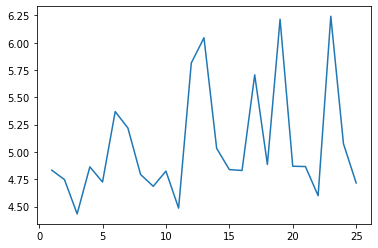

In [8]:
path=input()
# print(len(path))
# print(path[52])
setUpRings(path)
setUpCroppedRings(path)
reload(plt)
displayThickness(path)